<a href="https://colab.research.google.com/github/as183789043/PyTorch-for-Deep-Learning-in-2023-Zero-to-Mastery/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow
Let's explore a an example Pytorch end-to-end workflow.



In [1]:
what_wewe_converting = {1:"data (preapre and load)",
             2:"build model",
             3:"fitting the model to data(traning)",
             4:"making predictions and evaluting a model (inference)",
             5:"saving and laoding a model",
             6:"putting it all together"}
what_wewe_converting

{1: 'data (preapre and load)',
 2: 'build model',
 3: 'fitting the model to data(traning)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and laoding a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  # nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__

'2.1.0+cu121'

## Data (preparing and loading)
Data can be almost anything ... in machine learning
- Excel
- Images of any kind
- Videos (Youtbe has lots of data)
- Audio like song or podcasts
- DNA
- Text

Machine Learmimng is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that  numercial representation

To showcase this,let's create some **Known** data using the linear regression formula


In [3]:
# creae *known*  parameters
import torch
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)  #shape(50,1)
y = weight * X + bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### spiltting data into traning and test sets (ones of the mosts importtant concepts in machine learning in genral)

let create traning and test set with our data

In [4]:
# create a train/test spilt
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visiualize our data ?
There is where data exploer's most comes in!

`Visiualize`

In [5]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [6]:
def plot_predictions(train_data=X_train,
          train_labels=y_train,
          test_data=X_test,
          testl_labels=y_test,
          predictions=None):
  """
  plots training data ,test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # plot test data in green
  plt.scatter(test_data,testl_labels,c="g",s=4,label="Testing data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data,predictions , c="r",s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size":14})

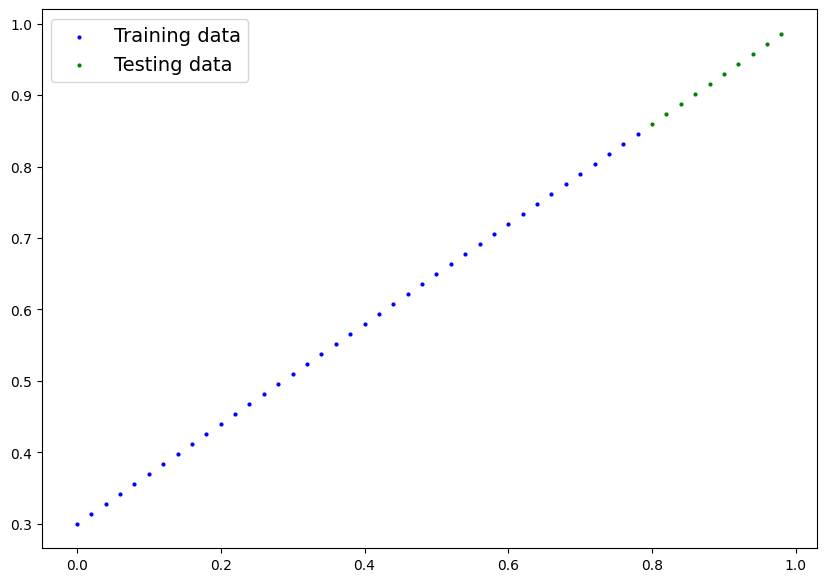

In [7]:
plot_predictions();

## Build model

Our First Pytorch mmodel!!

Need to familiar oop python

## What our model does:
- Start with random values(weight & bias)
- Look at traning data and adjust the random values to better  represent (or get close to ) the ideal values (the weight & bias values we used to create the data )

## How does it do so ?
Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [8]:
# create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module):  # <- almost eveything in pytorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                        requires_grad=True,
                        dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                        requires_grad=True,
                        dtype=torch.float))
    # Forword method to define the computation in the model
  def forward(self, x: torch.Tensor) ->torch.Tensor: #　<- x is the input data
    return self.weights * x + self.bias # thiis is the linear regression formula

In [9]:
## oop 物件導向範例 繼承function

class Animal:
    name = ''

    def __init__(self, name):
        self.name = name

    def walk(self):
        print('walking')

    def eat(self):
        print('eating')


class Dog(Animal):
    def __init__(self, name):
        super().__init__(name)

    def walk(self):
        print('{0} using foot walk'.format(self.name))

    def teat(self):
        print('{0} eat bone'.format(self.name))


animal = Dog('A')
animal.eat()
animal.walk()

eating
A using foot walk


### Pytorch model building esssentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational)

* torch.nnParameter - why parametes should our model try and learn, often a Pytorch layer from torch.nn will set these for us

* trch.nn.Module - The base class for all neural network modules , if you subclass it ,you should overwrite forword()
- torch.optim - this where the optimizers in pytorch live , they will help with gradient descent
* def forward() - All nn.module subclasses require you to overwrite forward(), this method defines what happems in the forwaed computation

### Checking the contents of our pytorch model
Now we've created a model, let's see what's  inside .
So we can check our model parameters or what's indise ourl model using .parameters().

In [10]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
#  list name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight,bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power let's see how well it predicts `y_test` base on `x_test`


In [13]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do somethig similar with torch.no_grad(), however , torch.inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

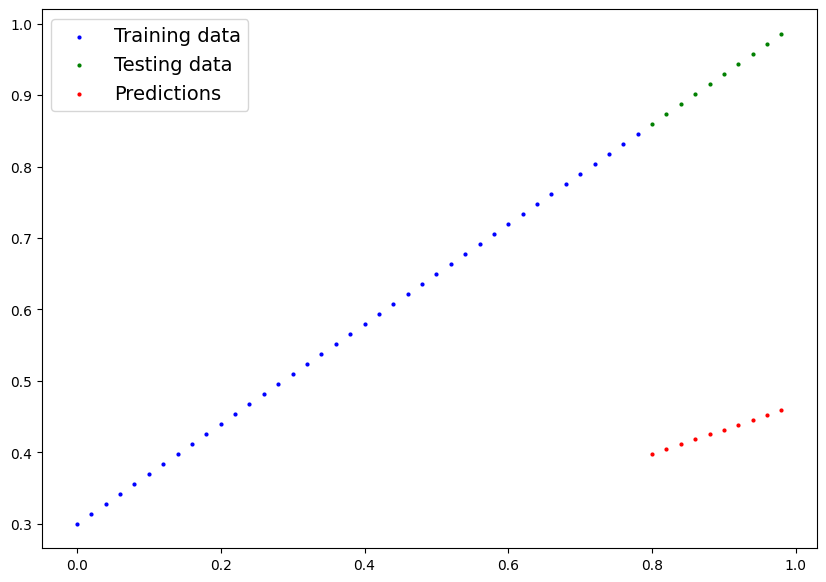

In [15]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some **unknown**
 parameters (theres may be random ) to some known parameters or in other words from a poor repressentation of the data to better repressentation of thre data

 one way to mesaure how poor or how wrong your models predictions are is tyo use a loss function

 * Note : Loss funtion may also be called cost function or criterion in differernt area

Things we need to train:

 * **Loss Function:** A function to measure how wrong your model's prections are to th e ideal outputs , lower is better

 * **Optimizer:** Takes inot account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

And Specifically for Pytorch, we need:
- A training loop
- A testing loop


In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## Check out our model's parameters (a parameters is a value that the model sets iteslf

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Set up a loss function  https://pytorch.org/docs/stable/nn.html#loss-functions
loss_fn = nn.L1Loss()
#　Ｓet an optimizer(stochastic gradient descent) https://pytorch.org/docs/stable/optim.html#algorithms
optimizer = torch.optim.SGD(params = model_0.parameters(),
                lr = 0.01) # = learning rate = possibiy the most import hyperparameter  you can set


## Building a training loop(and a testing loop) in pytorch

A couple of things we need in a  rainig loop :

0. Loop through the data

1. Forward pass (that's invloves data moving through  our model's `forwrad()` functions) to make predictions on data - also called forward propagation

2. Calculate the loss(compare forwad pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss backward - move backwards through the network to calculate the gradients of each of parameters of our model with respect to loss(**backpropagation**)

5. Optimizer step - use optimizer to adjust orl model's parameters to try and import the loss (**gradent descent**)


In [19]:
model_0.parameters()

<generator object Module.parameters at 0x7dc2f92b5e00>

In [20]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [21]:
#模型重新運行參數會保存過去並以此為起點繼續優化
#An epoch is one loop through the data ...(this is a hyperparameter beacusse we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0.Loop through the data
for epoch in range(epochs):
  # seet the model to training mode
  model_0.train() # train mode in pytorch set all parametes that require gradients to require  gradients

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate  the loss
  loss = loss_fn(y_pred,y_train)
  print(f"loss:{loss}")
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so ... we have to zero them above in step 3 for the next iteration of the loop

  model_0.eval() #truns off  diferent settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turn off gradient tracking & couple more behind the scenes
  #print out model state_dict()
    # 1.Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)
  # print out what happen
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Test: {loss} |Test Loss: {test_loss}")

    print(model_0.state_dict())

loss:0.31288138031959534
Epoch:0 | Test: 0.31288138031959534 |Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss:0.3013603389263153
loss:0.28983935713768005
loss:0.2783183455467224
loss:0.26679736375808716
loss:0.2552763521671295
loss:0.24375534057617188
loss:0.23223432898521423
loss:0.22071333229541779
loss:0.20919232070446014
loss:0.1976713240146637
Epoch:10 | Test: 0.1976713240146637 |Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss:0.18615034222602844
loss:0.1746293306350708
loss:0.16310831904411316
loss:0.1515873372554779
loss:0.14006635546684265
loss:0.1285453587770462
loss:0.11702437698841095
loss:0.1060912236571312
loss:0.09681284427642822
loss:0.08908725529909134
Epoch:20 | Test: 0.08908725529909134 |Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
loss:0.08227583020925522
loss:0.07638873159885406
loss:0.071

In [22]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
weight,bias

(0.7, 0.3)

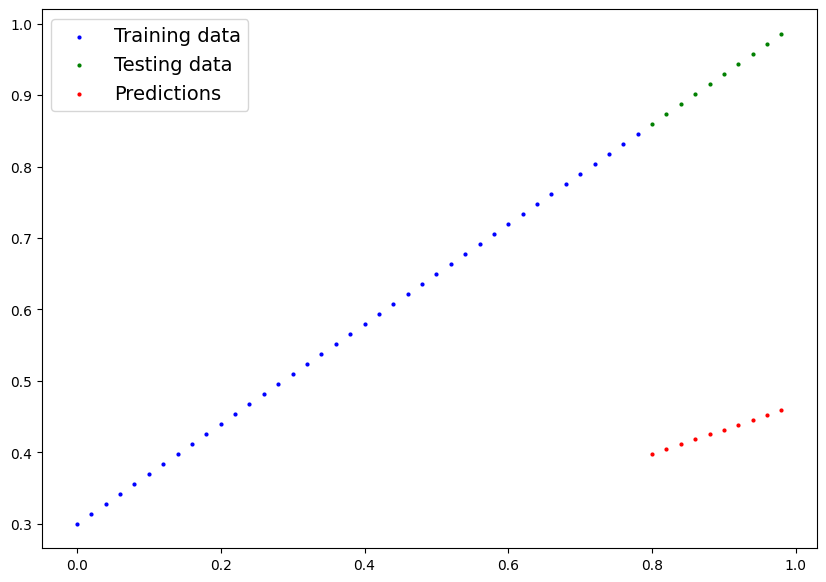

In [25]:
# origin predict
plot_predictions(predictions=y_preds)


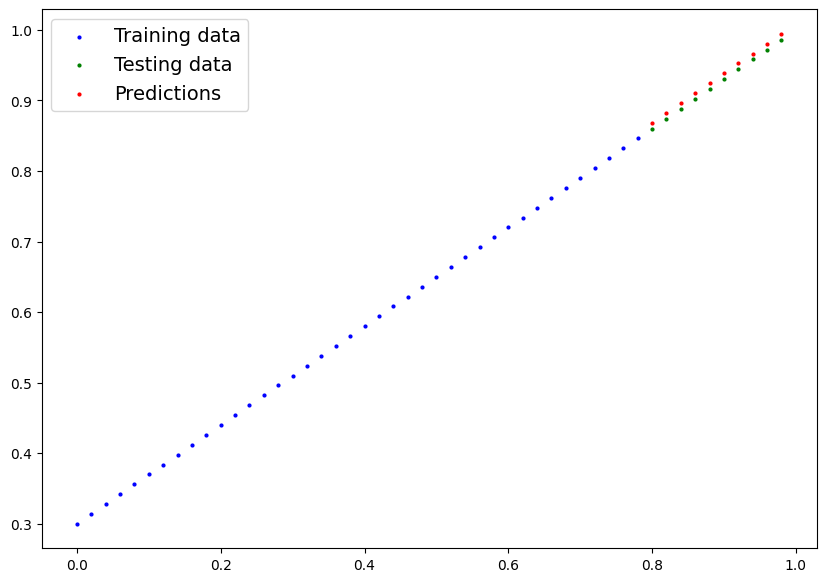

In [26]:
# new predict with gradient descent and backpropagation
plot_predictions(predictions=y_preds_new)

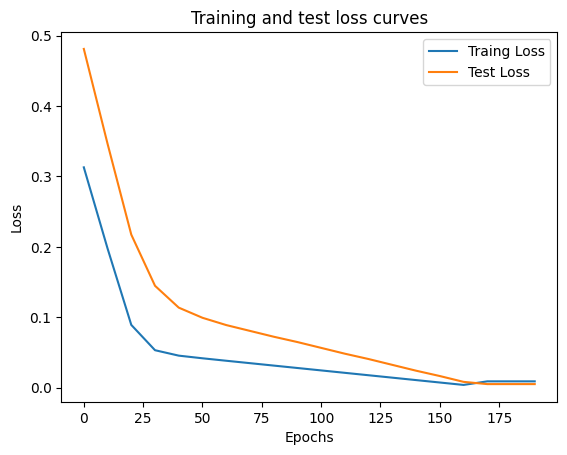

In [27]:
#  Plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label ="Traing Loss")
plt.plot(epoch_count,test_loss_values,label ="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving the model in pytorch

Trere are three main methods youu should about for saving and loading models in PyTorch.

1. `Pytorch.save()` - allows you save a Pytorch object in Python's pickle format

2. `torch.load()` -  allows you load saced PyTorch object
3. `torch.nn.MOdule.load_state_dict()` - this allows to load a model's saved state dictionary


In [28]:
# Saving our PyTorch model
from pathlib import Path

#1. Create model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME="01_pytorch_workflow_model1_0.pth"
MODEL_SAVE_PATH =MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"SAVING MODEL TO:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

SAVING MODEL TO:models/01_pytorch_workflow_model1_0.pth


In [29]:
!ls -l models


total 4
-rw-r--r-- 1 root root 1686 Dec 22 12:50 01_pytorch_workflow_model1_0.pth


## Loading a PyTorch model
Since we saved ourl model's `state_dict()` rather the entire model,we'll create a new instance of our model class and load th e saved `state_dict()` into that.

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [31]:
# To load in a saved state_dict we have to instantiate a new instance of uur model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_9 (that will update the new instance with updated parameters)

In [32]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [34]:
# Make some predictions with ourl loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [35]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [36]:
# make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6.Puttting it all together Let;s go back through the steps above and see it all in one place

In [37]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch Version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code

This meansif we've got access to a GPU, our code will use (for protentially faster computing ).

If no GPU is avilable,the code will defaqlt to using  CPU

In [38]:
# Setup deevice agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [39]:
!nvidia-smi

Fri Dec 22 12:50:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data


In [40]:
#　Create some data using the linear regression formaula of y = weight* X+ bias
weight = 0.7
bias =0.3
# cREATE RNGE VALUES
start = 0
end  = 1
step  = 0.02

# Create X and  Y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) #withour unsqueeze,error will pop
y = weight * X +bias
X[:10],y[10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([0.4400]))

In [41]:
# Split data
train_split = int(0.8* len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

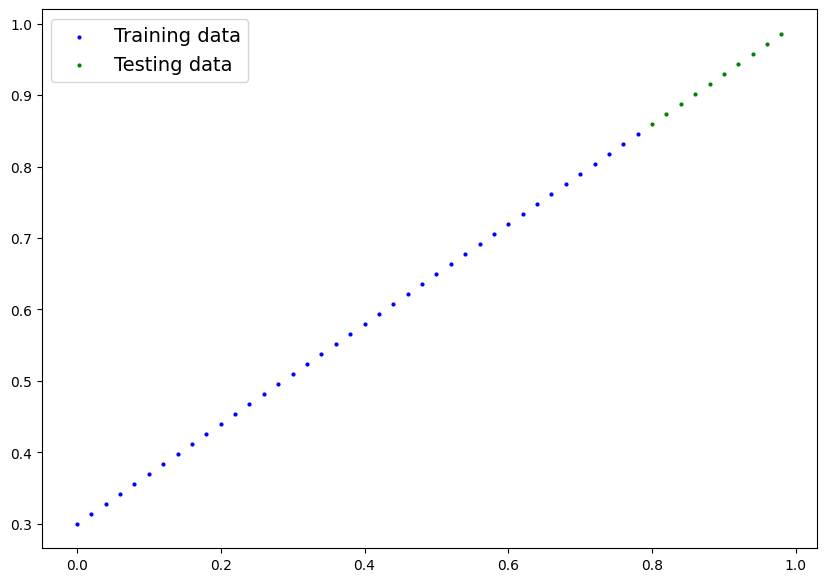

In [42]:
# Plot the data
# Note: if you don't have the plot_predictions() functionn loaded, this wil error
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 Building a PyTorh Linear model

In [43]:
#Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    #self Use nn.Linear() for creaqting the model parameters / also called : linear transform ,probing layer , fully connected layer , dense layer
    self.linear_layer = nn.Linear(in_features=1,
                    out_features=1)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1 , model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [44]:
# Ckeck the model current device
next(model_1.parameters()).device

device(type='cpu')

In [45]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [46]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### 6.3 Training

For training we need:
*  Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [47]:
# Setup loss function
loss_fn = nn.L1Loss() #same as MAE

# Setup our Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                lr=0.01)


In [48]:
# Let;s write a training lloop
torch.manual_seed(42)

epoch=200
for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Caculate Loss Function
  loss = loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

    # Print out what's happenging

    if epoch % 10 ==0 :
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

RuntimeError: ignored

####上述錯誤為資料在cpu上 模型在gpu上產生問題

In [49]:
# Let;s write a training lloop
torch.manual_seed(42)

############# ADD Data To GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
############

epoch=200
for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Caculate Loss Function
  loss = loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

    # Print out what's happenging

    if epoch % 10 ==0 :
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [51]:
weight,bias

(0.7, 0.3)

## 6.4 Making and evaluating predictions


In [52]:
# Turn model into evaluation mode
model_1.eval()

# Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

TypeError: ignored

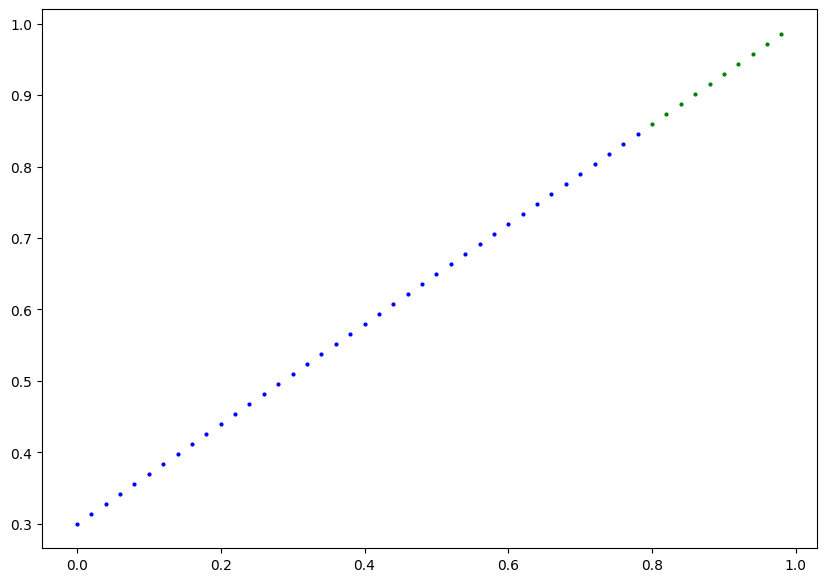

In [53]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds)

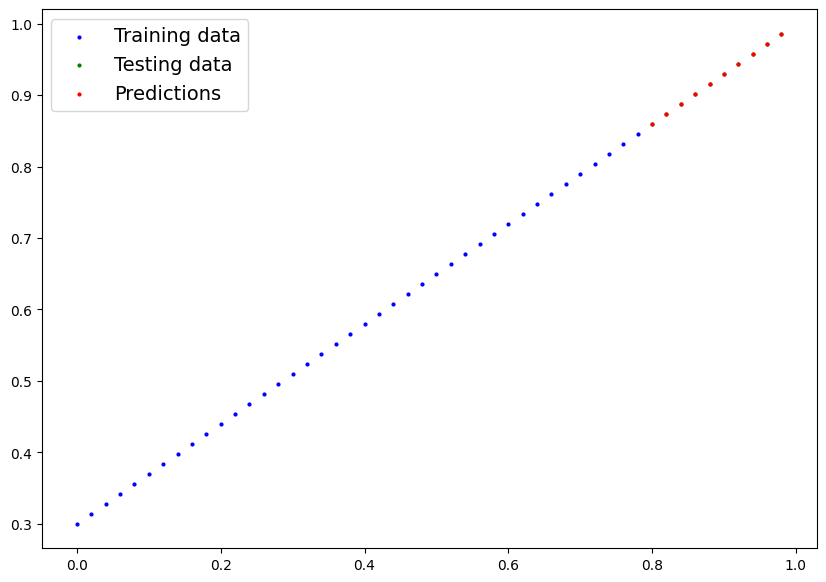

In [54]:
plot_predictions(predictions=y_preds.cpu())

###  Saving & loading a trained model

In [55]:
from pathlib import Path

# 1.Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2.Crete model save path
MODEL_NAME="01_pytorch_workflow__1.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving Model To: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving Model To: models/01_pytorch_workflow__1.pth


In [57]:
# Load a Pytorch model

# Create a new insta of linear rgression model V2
loaded_model_1=LinearRegressionModelV2()

# Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [59]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [60]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [61]:
# Evaluate loaded mdel
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds



tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')